In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, ParameterGrid
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
import warnings
import time
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/regional_univariate_data.csv')
enc = pd.read_csv('../data/regional_datasets/univariate/enc_data_univ.csv').drop(columns = 'Unnamed: 0')
esc = pd.read_csv('../data/regional_datasets/univariate/esc_data_univ.csv').drop(columns = 'Unnamed: 0')
midatl = pd.read_csv('../data/regional_datasets/univariate/mid_atlantic_data_univ.csv').drop(columns = 'Unnamed: 0')
mount = pd.read_csv('../data/regional_datasets/univariate/mountain_data_univ.csv').drop(columns = 'Unnamed: 0')
ne = pd.read_csv('../data/regional_datasets/univariate/new_england_data_univ.csv').drop(columns = 'Unnamed: 0')
pac = pd.read_csv('../data/regional_datasets/univariate/pacific_data_univ.csv').drop(columns = 'Unnamed: 0')
satl = pd.read_csv('../data/regional_datasets/univariate/south_atlantic_data_univ.csv').drop(columns = 'Unnamed: 0')
wnc = pd.read_csv('../data/regional_datasets/univariate/wnc_data_univ.csv').drop(columns = 'Unnamed: 0')
wsc = pd.read_csv('../data/regional_datasets/univariate/wsc_data_univ.csv').drop(columns = 'Unnamed: 0')

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(actual,forecast): 
    actual, forecast = np.array(actual), np.array(forecast)
    return 100/len(actual) * np.sum(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

East North Central
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17632.850, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17382.095, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17156.618, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17630.850, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17145.818, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17140.795, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17284.981, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17133.456, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=17218.623, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=17127.906, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=17192.805, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=17113.805, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=17194.351, Time=0.04 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=17154.764, Time=0.24 sec


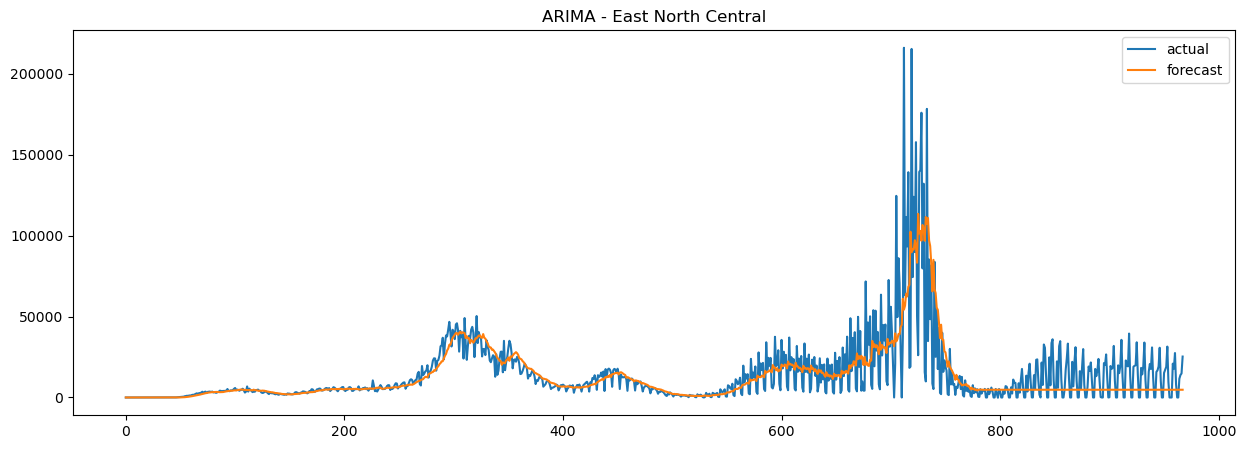

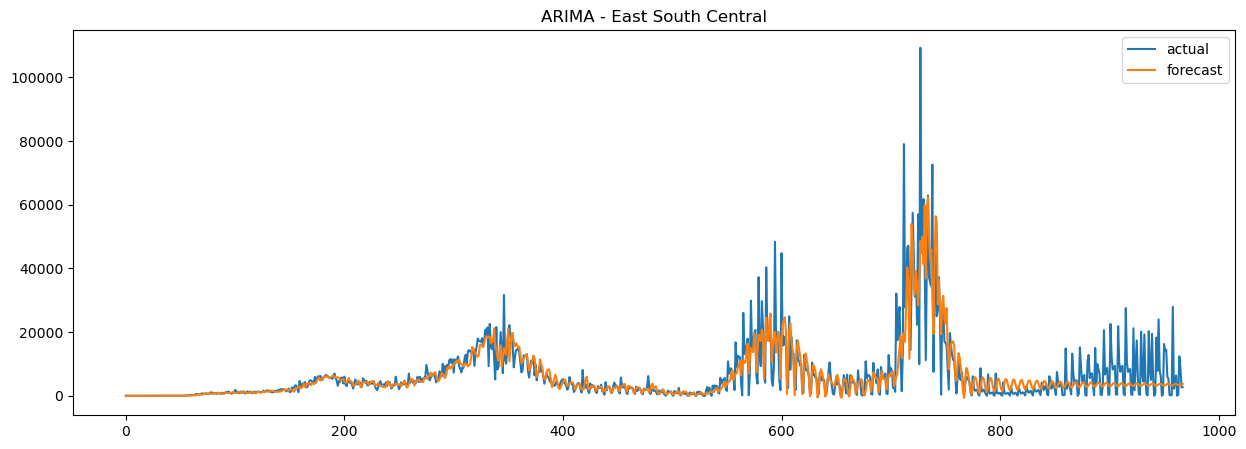

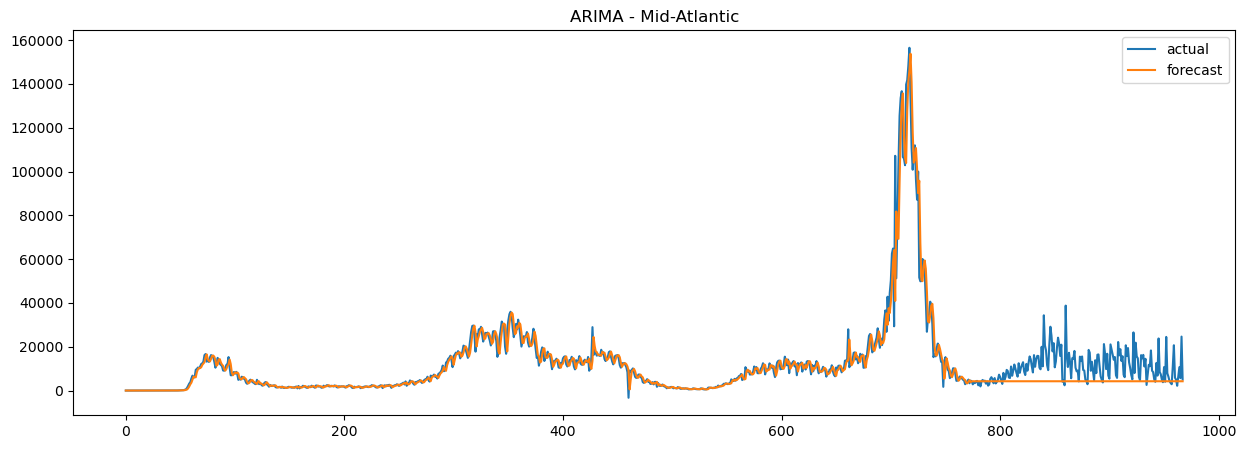

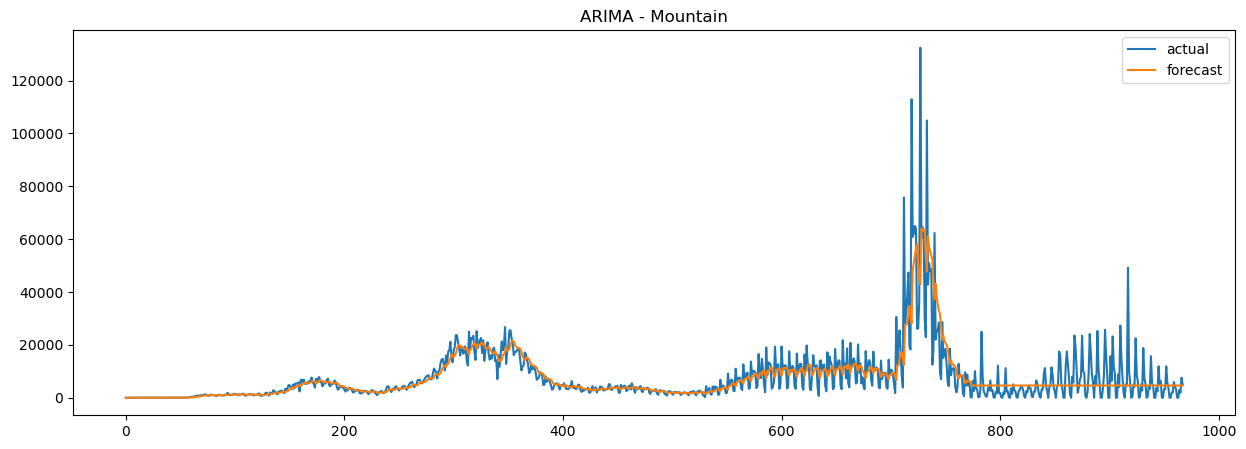

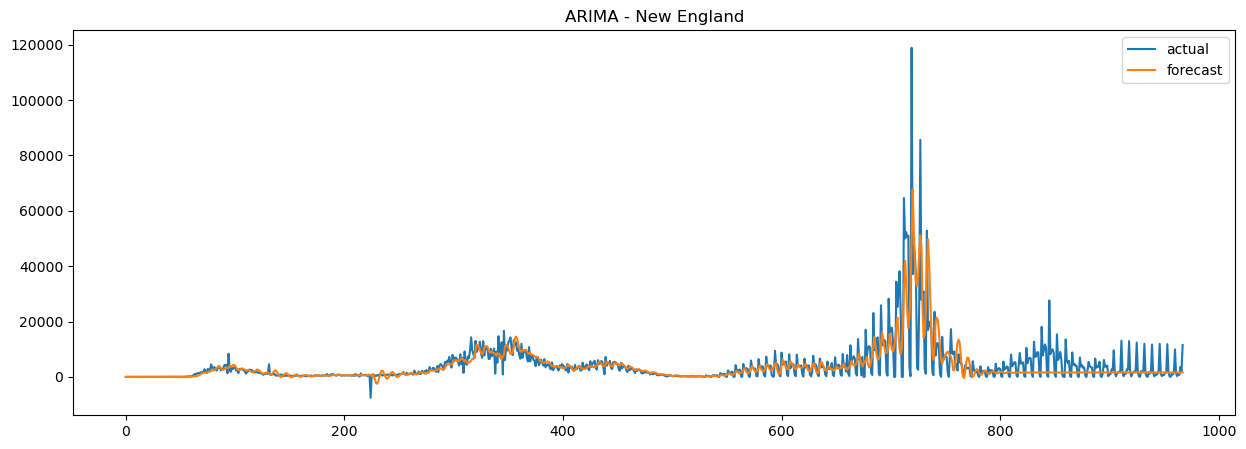

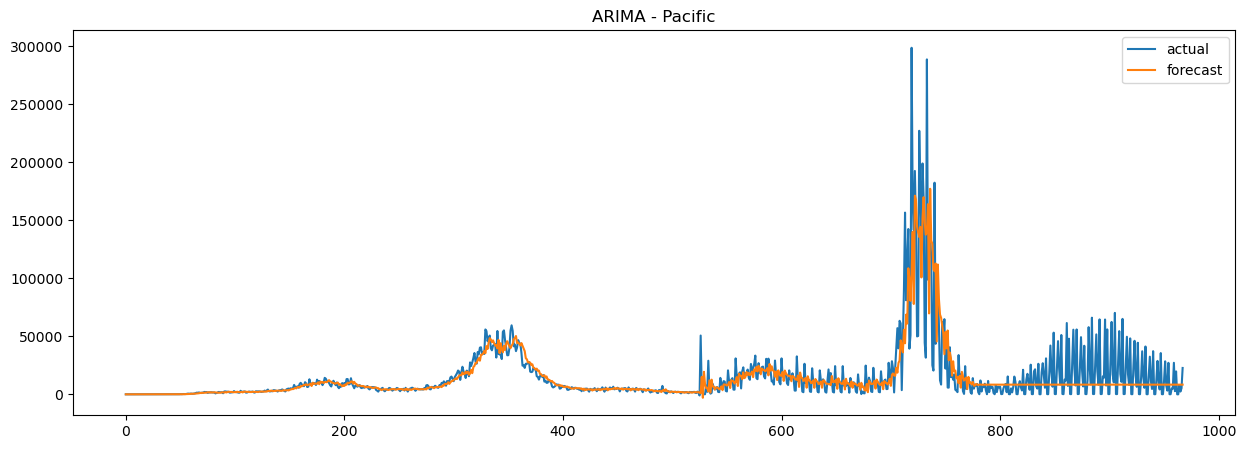

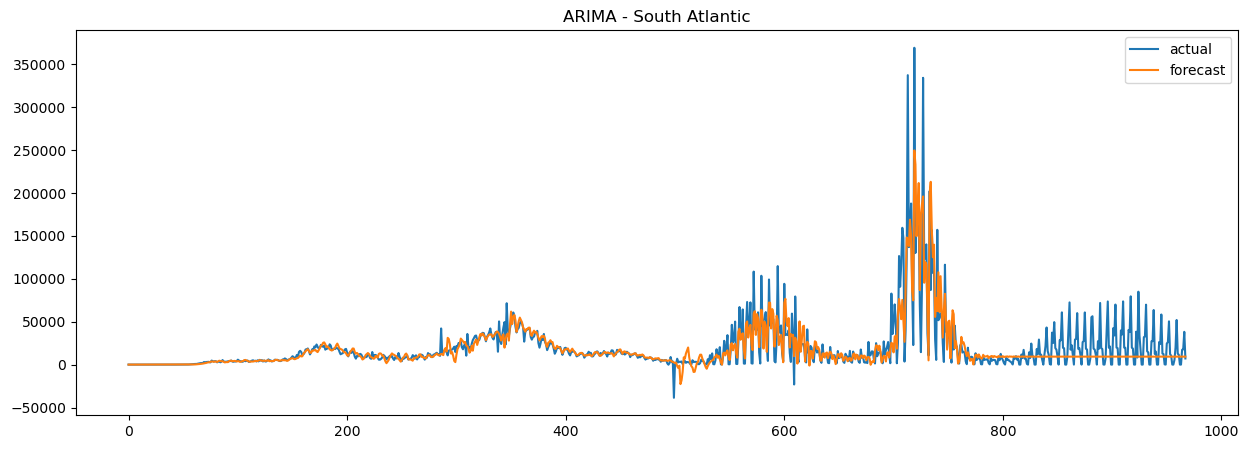

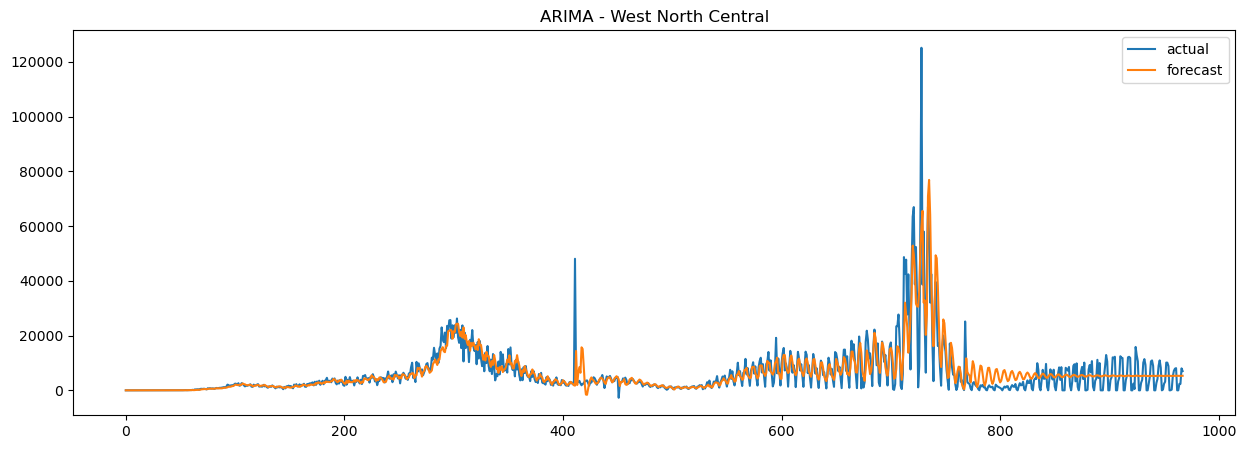

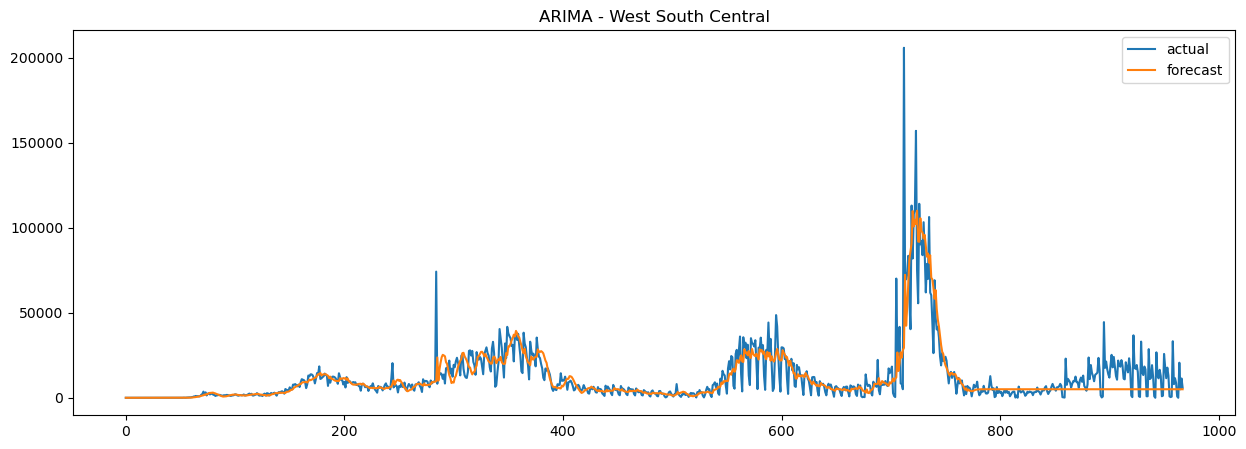

In [11]:
params = []
smapes = []
mases = []
for data1 in [enc, esc, midatl, mount, ne, pac, satl, wnc, wsc]:
    start = time.time()
    print(data1.region.unique()[0])
    data = data1[['date', 'new_confirmed']].rename(columns = {'date': 'ds', 'new_confirmed': 'y'})
    size = round(data.shape[0]*0.2)
    train = data.iloc[:-size]
    test = data.iloc[-size:].reset_index().drop(columns = 'index')
    model = auto_arima(train.y, start_p = 0, max_p = 5, 
                       start_d = 0, max_d = 5, start_q = 0, max_q = 5,
                       seasonal = True, stepwise = True, trace=True,
                       error_action='ignore', suppress_warnings=True)
    print(model.aic())
    train_pred=model.fittedvalues()
    test_pred=model.predict(n_periods=len(test))
    pd.concat([(pd.concat([train, train_pred], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"}), 
           (pd.concat([test, test_pred.reset_index().drop(columns = 'index')], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"})]
           ,axis = 0).reset_index().drop(columns = 'index').plot(figsize = (15,5))
    plt.title('ARIMA - ' + data1.region.unique()[0])
    print(time.time() - start)


In [10]:
pd.concat([(pd.concat([train, train_pred], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"}), 
           (pd.concat([test, test_pred.reset_index().drop(columns = 'index')], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"})]
           ,axis = 0).reset_index().drop(columns = 'index')

,date,actual,forecast
0,2020-01-22,0.0,0.000000
1,2020-01-23,0.0,0.000000
2,2020-01-24,0.0,0.000000
3,2020-01-25,0.0,0.000000
4,2020-01-26,0.0,0.000000
...,...,...,...
963,2022-09-11,0.0,5013.664551
964,2022-09-12,20617.0,5013.664551
965,2022-09-13,4988.0,5013.664551
966,2022-09-14,11344.0,5013.664551


In [9]:
test_pred

774    3860.137041
775    3955.362170
776    4257.766743
777    4537.225246
778    4737.425401
          ...     
963    5013.664551
964    5013.664551
965    5013.664551
966    5013.664551
967    5013.664551
Length: 194, dtype: float64

In [7]:
(pd.concat([test, test_pred], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"})

,date,actual,forecast
0,2022-03-06,828.0,NaN
1,2022-03-07,4373.0,NaN
2,2022-03-08,7669.0,NaN
3,2022-03-09,6091.0,NaN
4,2022-03-10,6682.0,NaN
...,...,...,...
963,NaN,NaN,5013.664551
964,NaN,NaN,5013.664551
965,NaN,NaN,5013.664551
966,NaN,NaN,5013.664551
